# Employee Attrition prediction Model


### Idea/ Solution: The objective of this model is to predict the behaviour of employees who are more likely to churn the organization. So that the organization can proactively take the measures to retain the valuable employees.

#### Solution Flow: 
1. The solution starts with data gathering which can be done by using feedback forms or data from the targeted population. 
2. Initially we will check for missing and improper data fields in our data set this is include handling outliers. 
3. Once data is mature then we will perform some analysis to get the insights like our data can have columns like Job Satisfaction Rating, Marital Status, Years in current role, Distance from home, Environment Satisfaction. We observed high influence of these factors in people decision to look for other job opportunities. 
4. After the features are finalized then we have to prepare the data to be used in our algorithms, will apply normalization and standardization to get optimum performance. 
5. In this stage our data is prepared and we have analysed the features, now we will select an algorithm check for the optimum performance according to the needs. 
6. Now we will further improve the algorithm by tuning hyper parameters. 
7. Once created our model is ready to be deployed. We can create our own server or use any PaaS. 
8. Further we can ensure to build a pipeline to update our model based on data added and new knowledge addition.

#### Benefits: 
1. Reduces cost of company on hiring and training new employees. 
2. Improves company employee retention rate. 
3. Retaining existing employee's will help organization to use employee's current experience which in turn will lead to company's growth rather than investing in new recruitment process.

In [154]:
# Importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [100]:
data = pd.read_excel("/Users/home/Desktop/Datasets/Datasets/new_attrition_case_study.xlsx",sheet_name ="Employee-Attrition")

In [101]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1,41,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Yes,3,8,1,6,4,0
1,0,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,No,4,10,3,10,7,1
2,1,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Yes,3,7,3,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Yes,3,8,3,8,7,3
4,0,27,Travel_Rarely,Research & Development,2,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,No,3,6,3,2,2,2


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
Attrition                  1470 non-null int64
Age                        1470 non-null int64
BusinessTravel             1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EmployeeNumber             1470 non-null int64
Gender                     1470 non-null object
JobLevel                   1470 non-null int64
JobRole                    1470 non-null object
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
OverTime                   1470 non-null object
PerformanceRating          1470 non-null int64
TotalWorkingYears          1470 non-null int64
WorkLifeBalance            1470 non-null

In [103]:
#As EmployeeNumber have all the Unique value, we will drop Customer Id
data = data.drop(labels=['EmployeeNumber'],axis=1)

In [104]:
#chceking for unigue categories inside each feature
data.nunique()

Attrition                     2
Age                          43
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PerformanceRating             2
TotalWorkingYears            40
WorkLifeBalance               4
YearsAtCompany               37
YearsInCurrentRole           19
YearsSinceLastPromotion      16
dtype: int64

# EDA and Data preprocessing

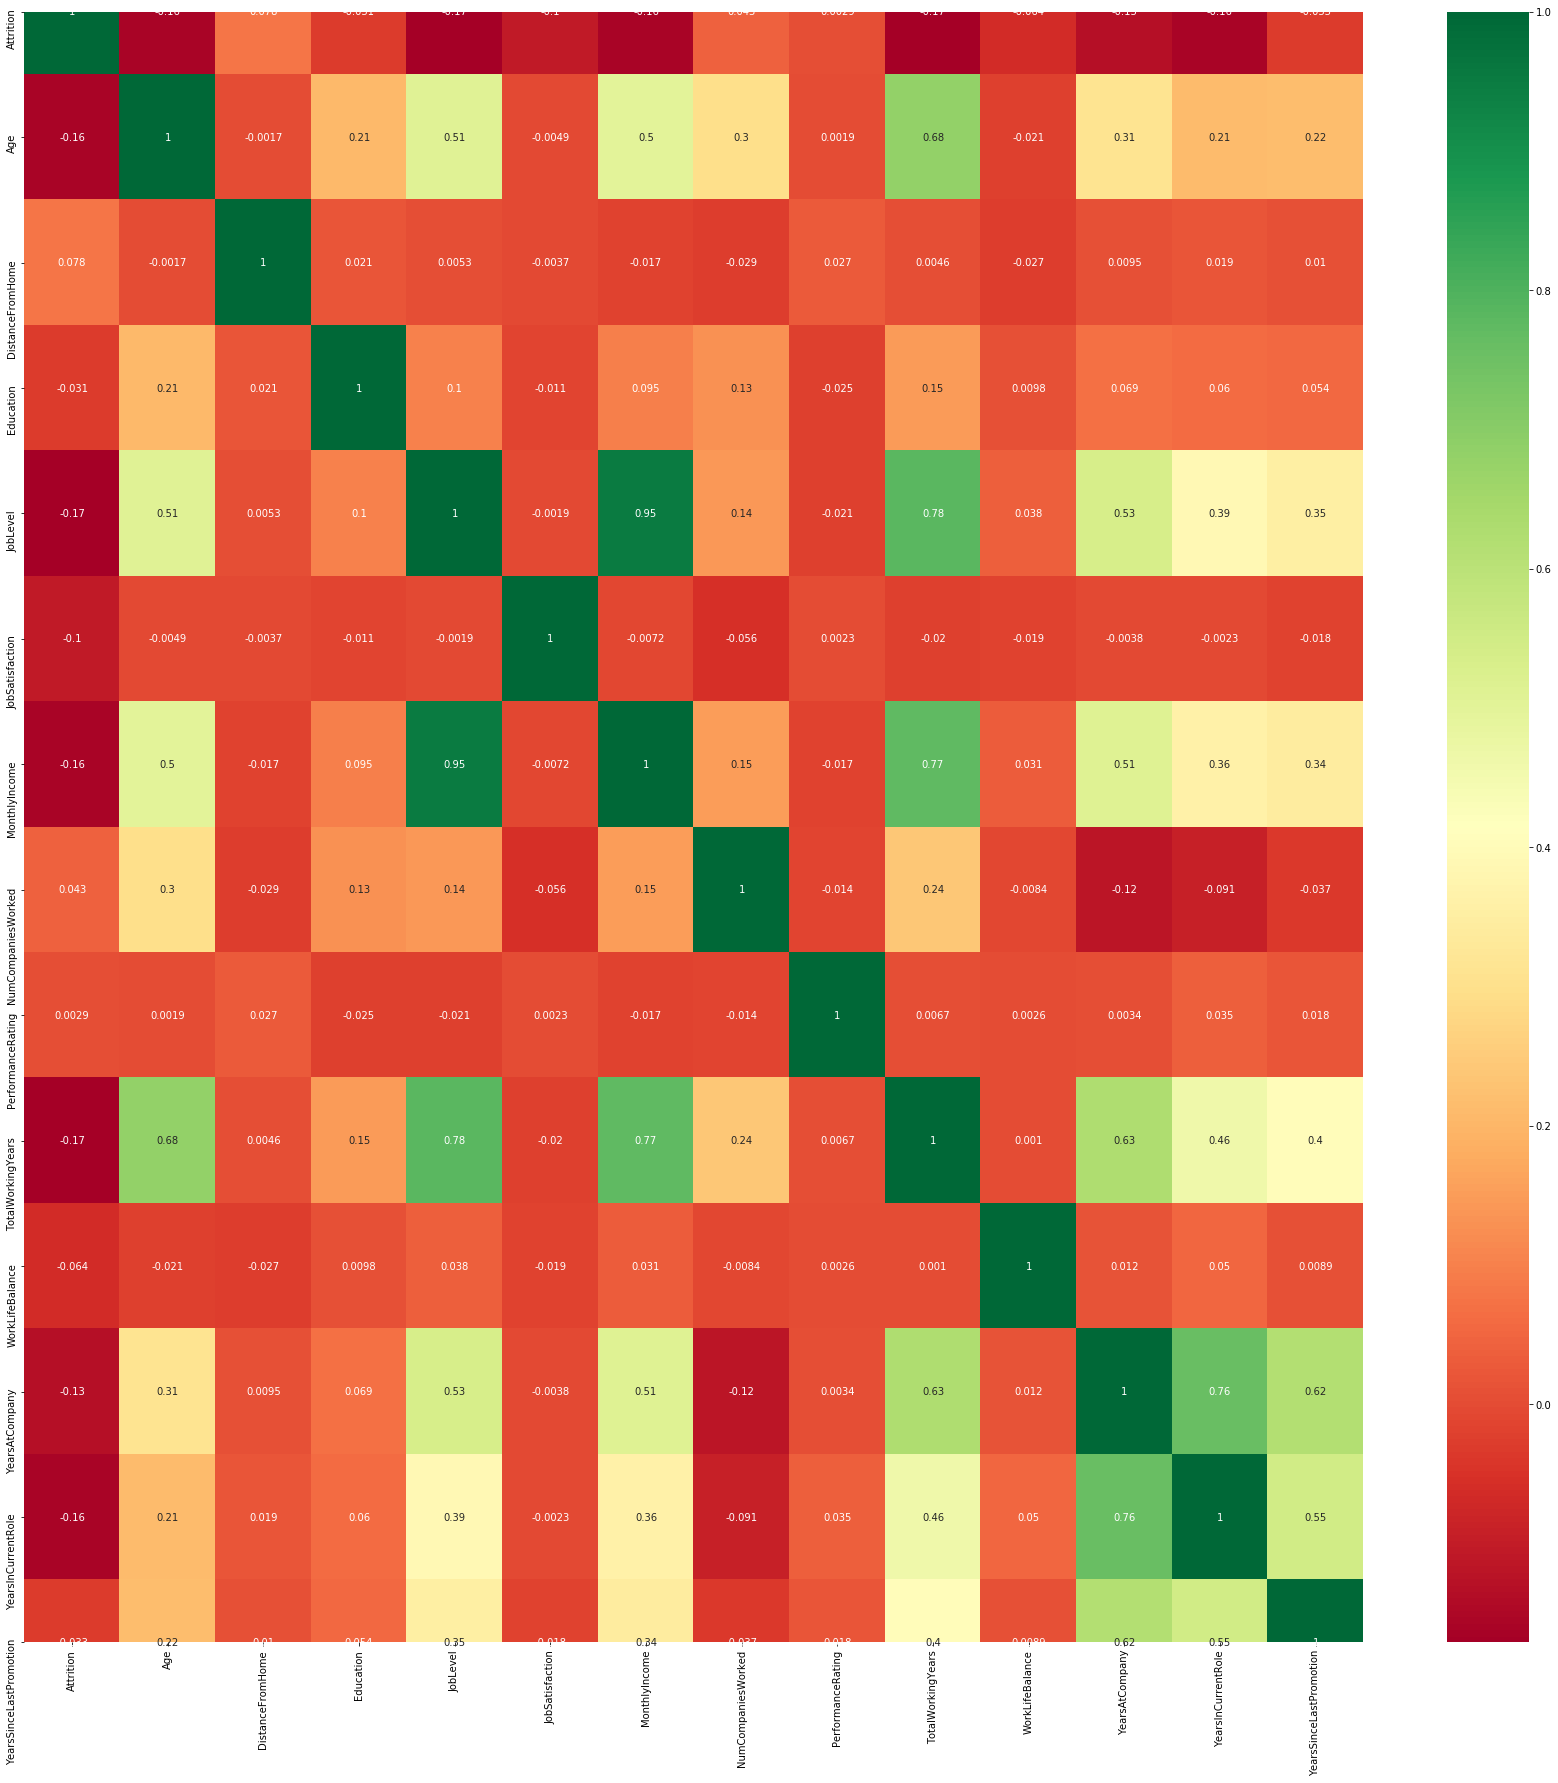

In [105]:
## Correlation
a= data.corr()
features = a.index
plt.figure(figsize=(30,30))
#plotting heatmap
g =sb.heatmap(data[features].corr(),annot =True,cmap ='RdYlGn')

In [106]:
data.describe()

,Attrition,Age,DistanceFromHome,Education,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,9.192517,2.912925,2.063946,2.728571,6502.931293,2.693197,3.153741,11.279592,2.761224,7.008163,4.229252,2.187755
std,0.367863,9.135373,8.106864,1.024165,1.106940,1.102846,4707.956783,2.498009,0.360824,7.780782,0.706476,6.126525,3.623137,3.222430
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,3.000000,6.000000,2.000000,3.000000,2.000000,0.000000
50%,0.000000,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000
75%,0.000000,43.000000,14.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,3.000000,15.000000,3.000000,9.000000,7.000000,3.000000
max,1.000000,60.000000,29.000000,5.000000,5.000000,4.000000,19999.000000,9.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000


In [107]:
# chceking for null values if any
data.isnull().sum()

Attrition                  0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

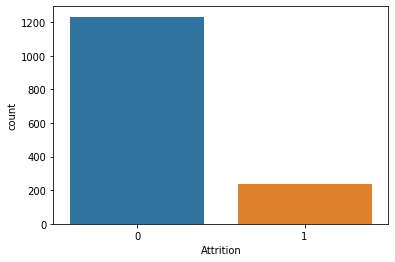

In [108]:
# Chceking for Sampling bias 
sb.countplot(data['Attrition'])

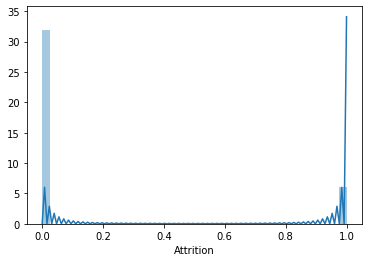

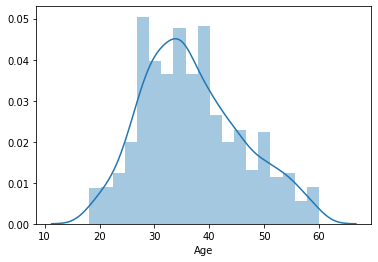

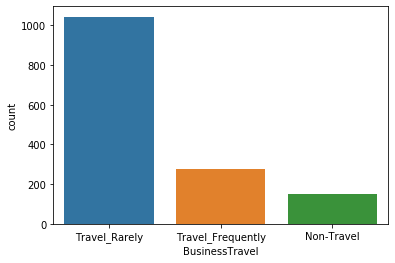

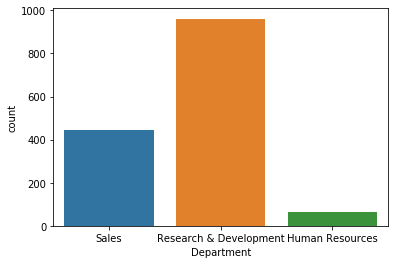

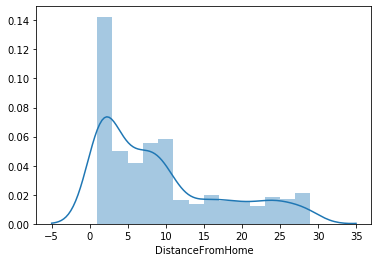

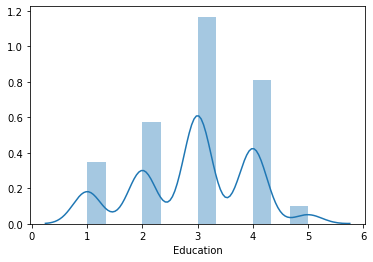

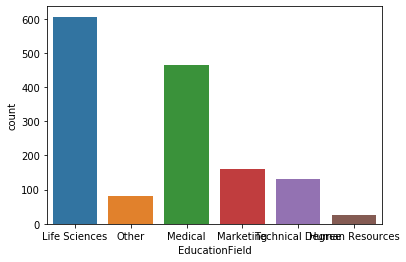

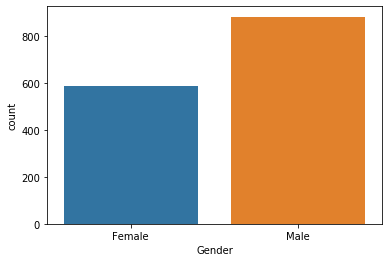

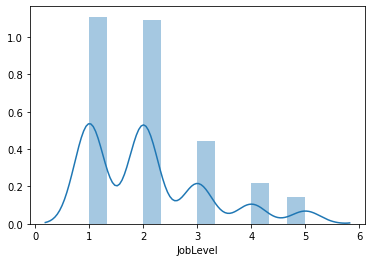

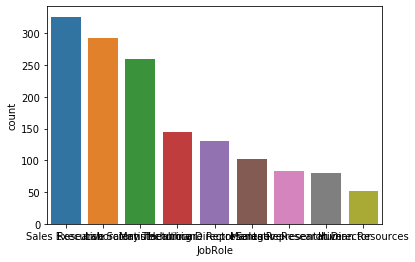

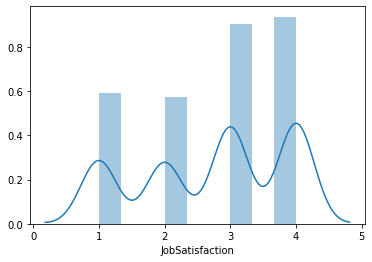

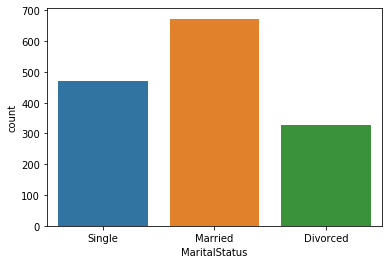

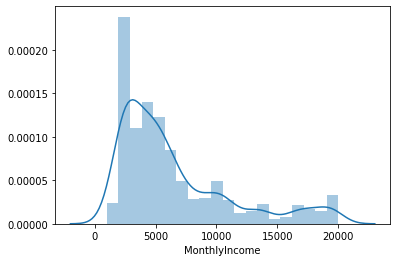

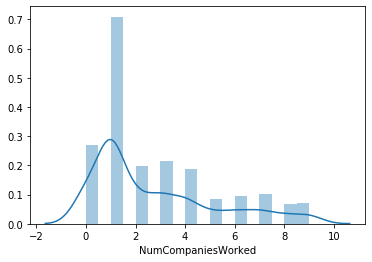

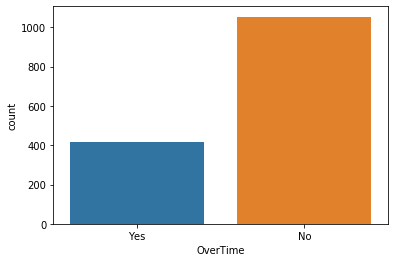

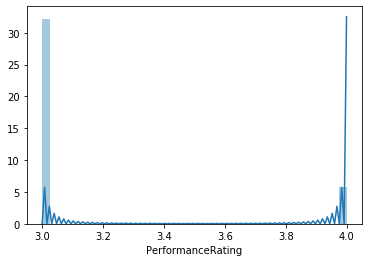

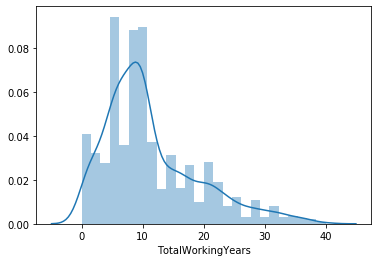

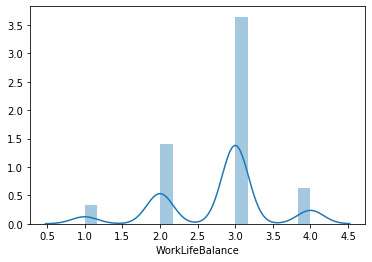

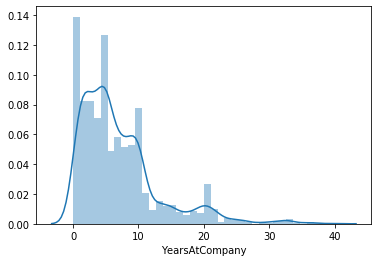

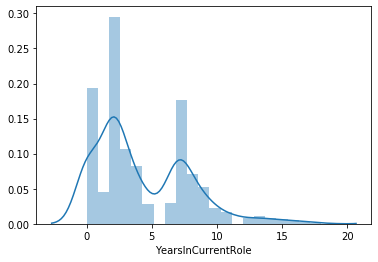

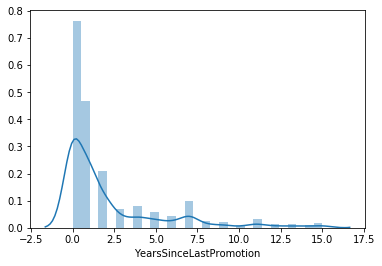

In [109]:
# univariant Analysis
import seaborn as sb
for i in data.columns:
    if(data[i].dtypes=="object"):
        sb.countplot(data[i])
        plt.show()
    else:
        sb.distplot(data[i])
        plt.show()

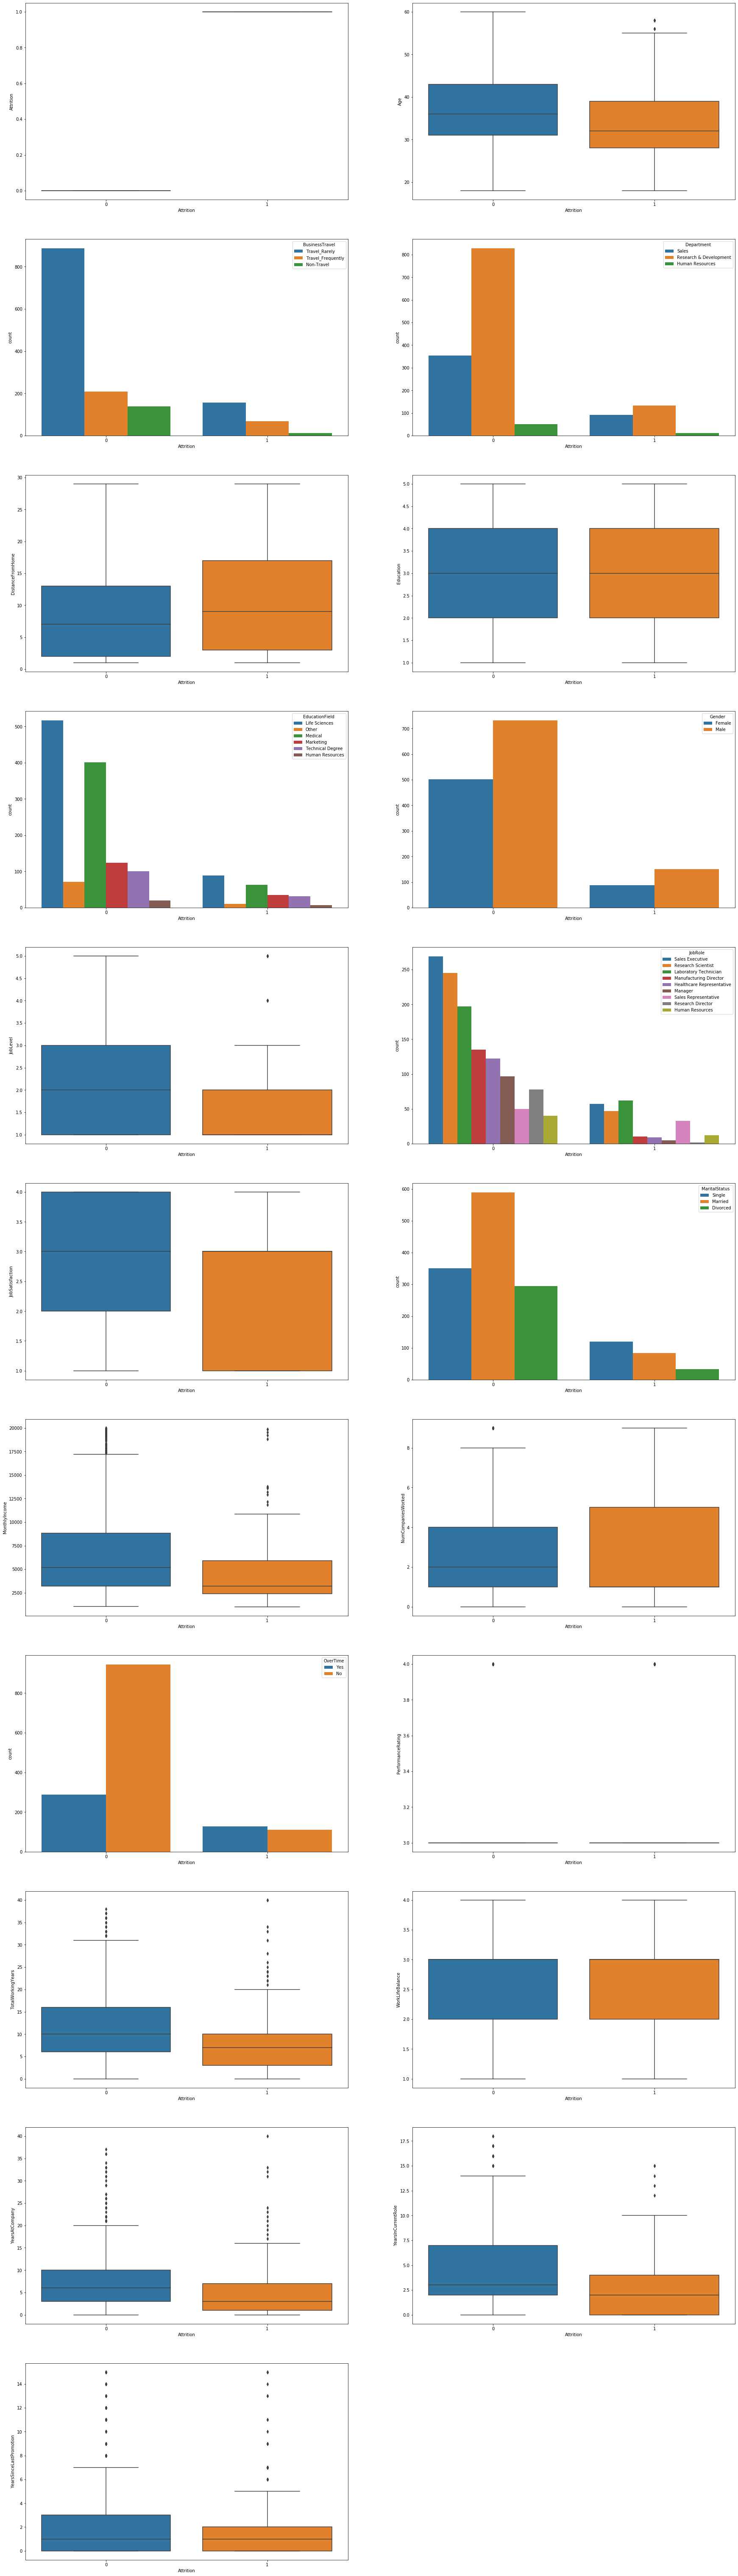

In [111]:
# bivariant Analysis
import seaborn as sb
import matplotlib.pyplot as plt
q = ((len(data.columns)+1)/2)
p=1
plt.figure(figsize=(30,111))
for i in data.columns:
    plt.subplot(q,2,p)
    if(data[i].dtypes=="object"):
        sb.countplot(data.Attrition,hue= data[i])
    else:
        sb.boxplot(data.Attrition,data[i])
    p =p+1

Numerical Variables

In [112]:
#numeric variable
numeric_features = [feature for feature in data.columns if data[feature].dtypes!="object" ]

print('Number of numerical variables: ', len(numeric_features))

Number of numerical variables:  14


In [113]:
data[numeric_features].head()

,Attrition,Age,DistanceFromHome,Education,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1,41,1,2,2,4,5993,8,3,8,1,6,4,0
1,0,49,8,1,2,2,5130,1,4,10,3,10,7,1
2,1,37,2,2,1,3,2090,6,3,7,3,0,0,0
3,0,33,3,4,1,3,2909,1,3,8,3,8,7,3
4,0,27,2,1,1,2,3468,9,3,6,3,2,2,2


In [114]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numeric_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


In [115]:
data[discrete_feature].head()

,Attrition,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,1,2,2,4,8,3,1,4,0
1,0,1,2,2,1,4,3,7,1
2,1,2,1,3,6,3,3,0,0
3,0,4,1,3,1,3,3,7,3
4,0,1,1,2,9,3,3,2,2


# Continuous Variable

In [116]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [117]:
data[continuous_feature].head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41,1,5993,8,6
1,49,8,5130,10,10
2,37,2,2090,7,0
3,33,3,2909,8,8
4,27,2,3468,6,2


In [118]:
continuous_feature

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']

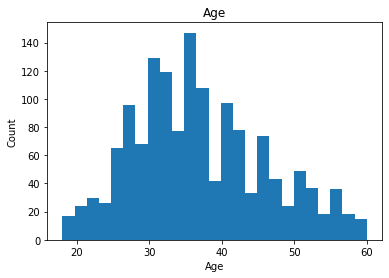

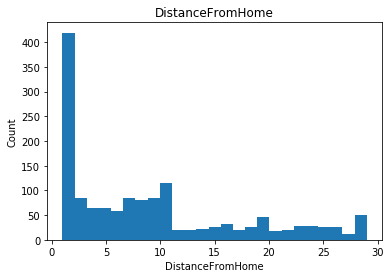

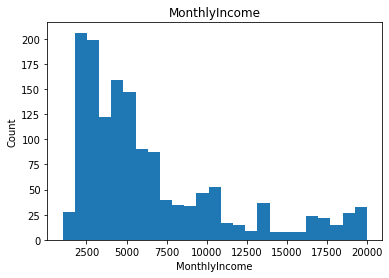

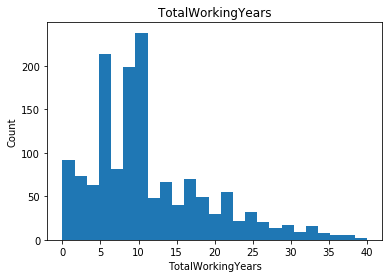

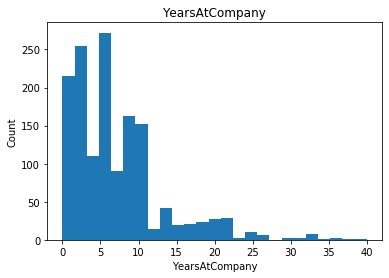

In [119]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    plt.hist(data[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Checking for outliers

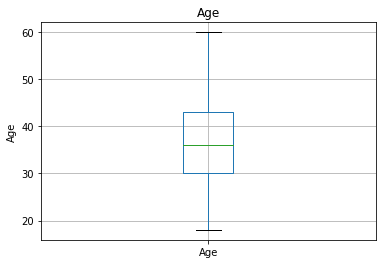

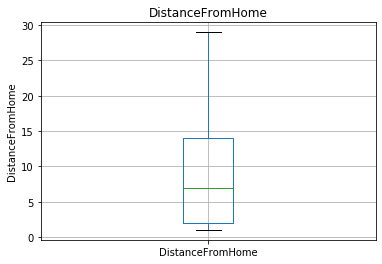

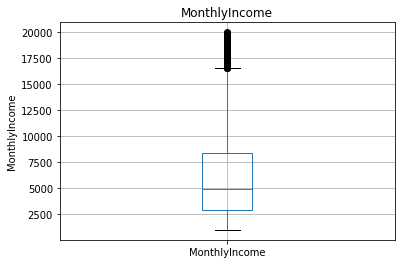

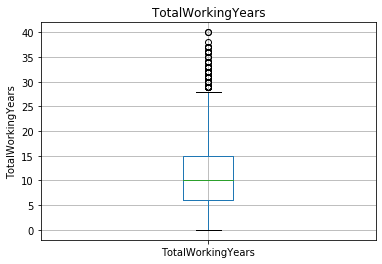

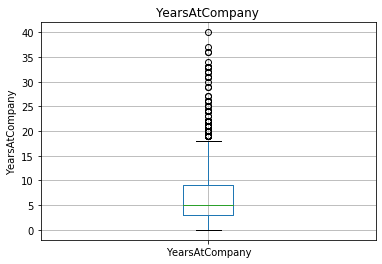

In [120]:
for feature in continuous_feature:
    data.boxplot(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Categorical Variables

In [121]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='object']
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [122]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is OverTime and number of categories are 2


# Handling Features

In [123]:
feature_to_handle = categorical_features + discrete_feature

In [124]:
feature_to_handle.remove('Attrition')

In [125]:
feature_to_handle

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [126]:
# one hot encoding
dataset =pd.get_dummies(data,columns =feature_to_handle,drop_first=True)

In [128]:
# Standardizing the data using standard scalar
#columns_to_scale =continuous_feature
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dataset[columns_to_scale] = sc.fit_transform(dataset[columns_to_scale])
dataset[continuous_feature] = data[continuous_feature]
dataset.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Education_2,Education_3,Education_4,Education_5,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,PerformanceRating_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15
0,1,41,1,5993,8,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,49,8,5130,10,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,37,2,2090,7,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,33,3,2909,8,8,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,27,2,3468,6,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
X = dataset.drop(['Attrition'],axis=1)
Y = dataset['Attrition']

### Splitting data into train and test set

In [130]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic regression

In [131]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Train score : {model.score(xtrain, ytrain)}\nTest score : {model.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))


Train score : 0.8801020408163265
Test score : 0.8741496598639455
[[241   4]
 [ 33  16]]
0.8741496598639455


C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
import sklearn.metrics as m
probs = lr.predict_log_proba(xtest)
preds =probs[:,1]
fpr,tpr,threshold = m.roc_curve(ytest,preds)
roc_auc = m.auc(fpr,tpr)

In [133]:
roc_auc

0.7851728446480634

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [134]:
print(m.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.80      0.33      0.46        49

   micro avg       0.87      0.87      0.87       294
   macro avg       0.84      0.66      0.70       294
weighted avg       0.87      0.87      0.85       294



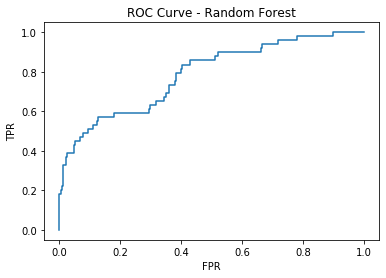

In [135]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

# fitting in various models

# SVM

In [136]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(xtrain, ytrain)

pred = classifier_svm.predict(xtest)

print(f"Train score : {classifier_svm.score(xtrain, ytrain)}\nTest score : {classifier_svm.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

C:\Users\home\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : 0.9659863945578231
Test score : 0.8333333333333334
[[245   0]
 [ 49   0]]
0.8333333333333334


# KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(metric='minkowski',p=2)
classifier_knn.fit(xtrain, ytrain)

pred = classifier_knn.predict(xtest)

print(f"Train score : {classifier_knn.score(xtrain, ytrain)}\nTest score : {classifier_knn.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 0.8452380952380952
Test score : 0.8095238095238095
[[235  10]
 [ 46   3]]
0.8095238095238095


# Decision tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier_tree.fit(xtrain, ytrain)

pred = classifier_tree.predict(xtest)

print(f"Train score : {classifier_tree.score(xtrain, ytrain)}\nTest score : {classifier_tree.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 1.0
Test score : 0.7925170068027211
[[215  30]
 [ 31  18]]
0.7925170068027211


# Random forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
classifier_forest.fit(xtrain, ytrain)

pred = classifier_forest.predict(xtest)

print(f"Train score : {classifier_forest.score(xtrain, ytrain)}\nTest score : {classifier_forest.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score : 0.9744897959183674
Test score : 0.8503401360544217
[[244   1]
 [ 43   6]]
0.8503401360544217


# Hyper parameter tunning using Grid search CV

In [140]:
tunning_parameters ={
    'max_depth':range(2,20,1),
    'criterion':['gini','entropy'],
    'n_estimators':[25,50,70,100,200]
}

In [141]:

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(estimator=classifier_forest,param_grid=tunning_parameters,scoring="accuracy",cv=5,n_jobs=-1)
cvmodel =cv.fit(xtrain,ytrain)
print('best_accuracy = ',cvmodel.best_score_)
print('best_parameters = ', cvmodel.best_params_)


best_accuracy =  0.858843537414966
best_parameters =  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 70}


In [142]:
classifier_forest = RandomForestClassifier(criterion='entropy',max_depth=11,n_estimators=50)
classifier_forest.fit(xtrain,ytrain)
pred = classifier_forest.predict(xtest)

print(f"Train score : {classifier_forest.score(xtrain, ytrain)}\nTest score : {classifier_forest.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 0.9464285714285714
Test score : 0.8469387755102041
[[243   2]
 [ 43   6]]
0.8469387755102041


In [143]:
print(m.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       245
           1       0.75      0.12      0.21        49

   micro avg       0.85      0.85      0.85       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.83      0.85      0.80       294



In [144]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,Y)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

### plot graph of feature importances for better visualization plotting top 20 important features.

### We see that features such as overtime, MartialStatus, Age, MonthlyIncome TotalWorkingYear, DistanceFromHome are playing significant role in our model. Hence these features can play a vital role in finding whether the employee will stay with the organization or will leave the organization. 

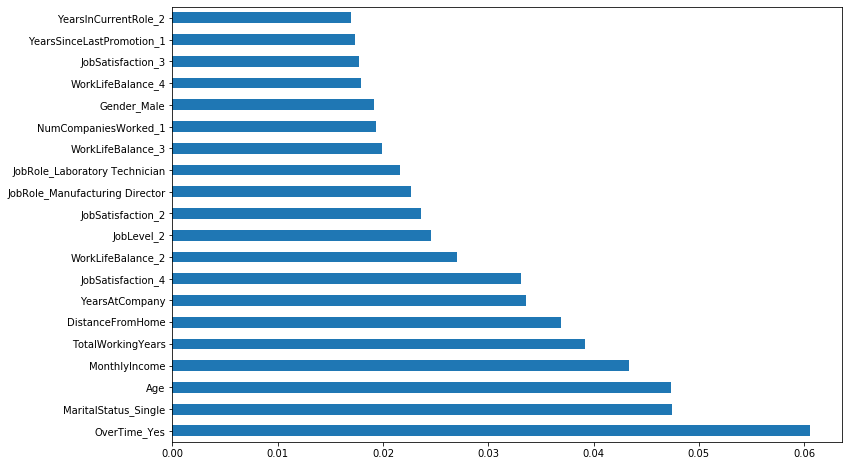

In [145]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [146]:
#Save the file to reuse
import pickle

In [147]:

file = open('Emp_attrition_prediction_new.pkl','wb')
pickle.dump(model,file)

In [149]:
file.close()

In [150]:
classifier = pickle.load(open('Emp_attrition_prediction_new.pkl','rb'))


In [151]:
pred = classifier.predict(xtest)

In [152]:
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

[[241   4]
 [ 33  16]]
0.8741496598639455
